## Image Classification using cv2 DNN

In [2]:
import cv2
import numpy as np

# read the ImageNet class names
with open('./input/classification_classes_ILSVRC2012.txt', 'r') as f:
    image_net_names = f.read().split('\n')
# final class names (just the first word of the many ImageNet names for one image)
class_names = [name.split(',')[0] for name in image_net_names]

# load the neural network model
model = cv2.dnn.readNet(model='./input/DenseNet_121.caffemodel', 
                      config='./input/DenseNet_121.prototxt', 
                      framework='Caffe')

In [3]:
# load the image from disk
image = cv2.imread('./input/image_1.jpg')
# create blob from image
blob = cv2.dnn.blobFromImage(image=image, scalefactor=0.01, size=(224, 224), 
                             mean=(104, 117, 123))
# set the input blob for the neural network
model.setInput(blob)
# forward pass image blob through the model
outputs = model.forward()

final_outputs = outputs[0]
# make all the outputs 1D
final_outputs = final_outputs.reshape(1000, 1)

In [10]:
#final_outputs

In [5]:
# get the class label
label_id = np.argmax(final_outputs)
label_id

292

In [17]:
# convert the output scores to softmax probabilities
probs = np.exp(final_outputs) / np.sum(np.exp(final_outputs))
# get the final highest probability
final_prob = np.max(probs) * 100.
# map the max confidence to the class label names
out_name = class_names[label_id]
out_text = f"{out_name}, {final_prob:.3f}"

# put the class name text on top of the image
cv2.putText(image, out_text, (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0),
            2)

array([[[ 43,  57,  69],
        [ 42,  56,  68],
        [ 43,  57,  69],
        ...,
        [ 48,  51,  55],
        [ 50,  51,  55],
        [ 53,  54,  58]],

       [[ 45,  59,  71],
        [ 44,  58,  70],
        [ 44,  58,  70],
        ...,
        [ 46,  49,  53],
        [ 48,  49,  53],
        [ 50,  51,  55]],

       [[ 42,  59,  68],
        [ 42,  59,  68],
        [ 43,  59,  71],
        ...,
        [ 46,  49,  53],
        [ 44,  47,  51],
        [ 45,  48,  52]],

       ...,

       [[ 67,  82, 101],
        [ 67,  82, 101],
        [ 65,  80,  99],
        ...,
        [ 47,  63,  62],
        [ 44,  60,  59],
        [ 41,  55,  54]],

       [[ 69,  84, 103],
        [ 67,  82, 101],
        [ 68,  83, 102],
        ...,
        [ 44,  63,  60],
        [ 44,  61,  58],
        [ 41,  58,  55]],

       [[ 69,  84, 103],
        [ 67,  82, 101],
        [ 68,  83, 102],
        ...,
        [ 42,  63,  60],
        [ 44,  61,  58],
        [ 41,  58,  55]]

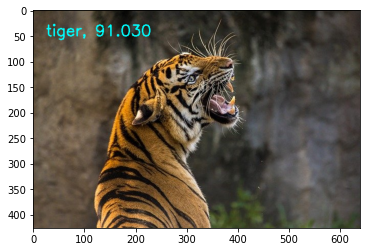

In [18]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()
#cv2.imwrite('../../outputs/result_image.jpg', image)